<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.221930,87.515742,39.564759,-0.905313,202.397117,203.099400,-0.702283
1,0.0,1.0,27.358579,85.175773,25.158899,1.861829,149.555081,147.763359,1.791721
2,0.0,2.0,48.047951,50.551370,56.589382,-2.596801,162.591901,165.116325,-2.524424
3,0.0,3.0,57.287854,71.672236,57.226650,1.813244,197.999984,196.057154,1.942830
4,0.0,4.0,93.433099,47.042189,20.924177,-1.348533,170.050932,170.959461,-0.908529
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.798766,64.267473,71.602501,-1.197450,204.471290,205.901626,-1.430335
59996,999.0,56.0,70.105994,48.595092,49.681872,1.097315,179.480273,178.282514,1.197759
59997,999.0,57.0,92.747353,87.361238,89.036946,0.894263,280.039801,279.938013,0.101788
59998,999.0,58.0,68.164230,82.755943,88.010537,1.407078,250.337788,249.565723,0.772065


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.221930,87.515742,39.564759,-0.905313,202.397117,203.099400,-0.702283
1,0.0,1.0,27.358579,85.175773,25.158899,1.861829,149.555081,147.763359,1.791721
2,0.0,2.0,48.047951,50.551370,56.589382,-2.596801,162.591901,165.116325,-2.524424
3,0.0,3.0,57.287854,71.672236,57.226650,1.813244,197.999984,196.057154,1.942830
4,0.0,4.0,93.433099,47.042189,20.924177,-1.348533,170.050932,170.959461,-0.908529
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.798766,64.267473,71.602501,-1.197450,204.471290,205.901626,-1.430335
59996,999.0,56.0,70.105994,48.595092,49.681872,1.097315,179.480273,178.282514,1.197759
59997,999.0,57.0,92.747353,87.361238,89.036946,0.894263,280.039801,279.938013,0.101788
59998,999.0,58.0,68.164230,82.755943,88.010537,1.407078,250.337788,249.565723,0.772065


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.221930  87.515742  39.564759  ...  202.397117  203.099400 -0.702283
      1.0    27.358579  85.175773  25.158899  ...  149.555081  147.763359  1.791721
      2.0    48.047951  50.551370  56.589382  ...  162.591901  165.116325 -2.524424
      3.0    57.287854  71.672236  57.226650  ...  197.999984  196.057154  1.942830
      4.0    93.433099  47.042189  20.924177  ...  170.050932  170.959461 -0.908529
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   59.798766  64.267473  71.602501  ...  204.471290  205.901626 -1.430335
      56.0   70.105994  48.595092  49.681872  ...  179.480273  178.282514  1.197759
      57.0   92.747353  87.361238  89.036946  ...  280.039801  279.938013  0.101788
      58.0   68.164230  82.755943  88.010537  ...  250.337788  249.565723  0.772065
      59.0   93.912795  57.969956  66.149525  ...  228.723524  228.255948  0.467576

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.221930  87.515742  39.564759  ...  202.397117  203.099400 -0.702283
      1.0    27.358579  85.175773  25.158899  ...  149.555081  147.763359  1.791721
      2.0    48.047951  50.551370  56.589382  ...  162.591901  165.116325 -2.524424
      3.0    57.287854  71.672236  57.226650  ...  197.999984  196.057154  1.942830
      4.0    93.433099  47.042189  20.924177  ...  170.050932  170.959461 -0.908529
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   59.798766  64.267473  71.602501  ...  204.471290  205.901626 -1.430335
      56.0   70.105994  48.595092  49.681872  ...  179.480273  178.282514  1.197759
      57.0   92.747353  87.361238  89.036946  ...  280.039801  279.938013  0.101788
      58.0   68.164230  82.755943  88.010537  ...  250.337788  249.565723  0.772065
      59.0   93.912795  57.969956  66.149525  ...  228.723524  228.255948  0.467576

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.221930,87.515742,39.564759,-0.905313,202.397117,203.099400,-0.702283
1,0.0,1.0,27.358579,85.175773,25.158899,1.861829,149.555081,147.763359,1.791721
2,0.0,2.0,48.047951,50.551370,56.589382,-2.596801,162.591901,165.116325,-2.524424
3,0.0,3.0,57.287854,71.672236,57.226650,1.813244,197.999984,196.057154,1.942830
4,0.0,4.0,93.433099,47.042189,20.924177,-1.348533,170.050932,170.959461,-0.908529
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.798766,64.267473,71.602501,-1.197450,204.471290,205.901626,-1.430335
59996,999.0,56.0,70.105994,48.595092,49.681872,1.097315,179.480273,178.282514,1.197759
59997,999.0,57.0,92.747353,87.361238,89.036946,0.894263,280.039801,279.938013,0.101788
59998,999.0,58.0,68.164230,82.755943,88.010537,1.407078,250.337788,249.565723,0.772065


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.221930  87.515742  39.564759  ...  202.397117  203.099400 -0.702283
      1.0    27.358579  85.175773  25.158899  ...  149.555081  147.763359  1.791721
      2.0    48.047951  50.551370  56.589382  ...  162.591901  165.116325 -2.524424
      3.0    57.287854  71.672236  57.226650  ...  197.999984  196.057154  1.942830
      4.0    93.433099  47.042189  20.924177  ...  170.050932  170.959461 -0.908529
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   59.798766  64.267473  71.602501  ...  204.471290  205.901626 -1.430335
      56.0   70.105994  48.595092  49.681872  ...  179.480273  178.282514  1.197759
      57.0   92.747353  87.361238  89.036946  ...  280.039801  279.938013  0.101788
      58.0   68.164230  82.755943  88.010537  ...  250.337788  249.565723  0.772065
      59.0   93.912795  57.969956  66.149525  ...  228.723524  228.255948  0.467576

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]

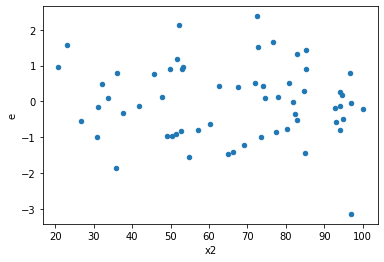

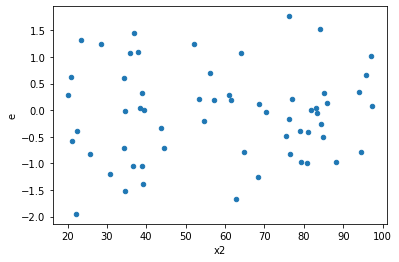

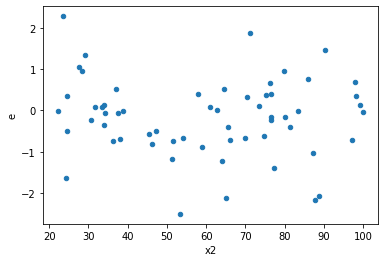

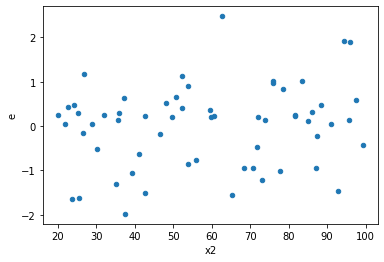

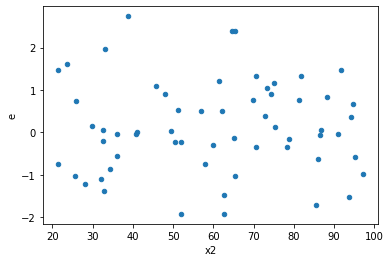

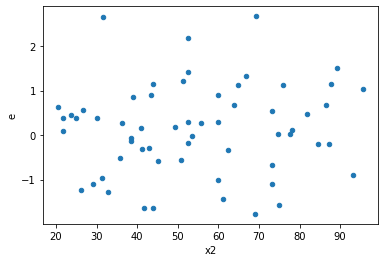

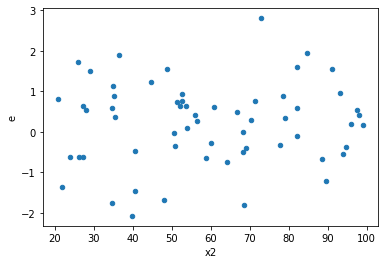

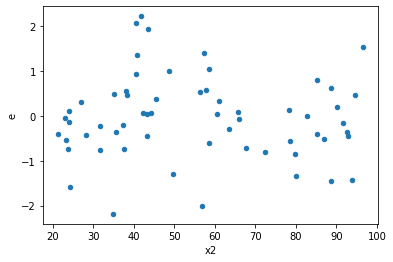

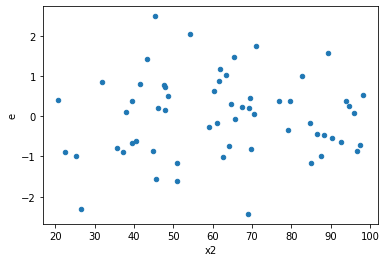

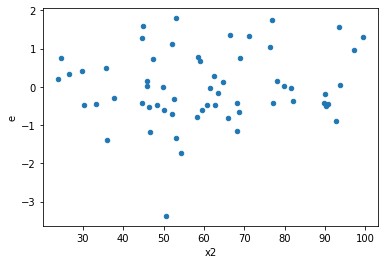

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,28.464430652785257,19.155461771062047,1.4232215326392628,0.9577730885531024,1.4859694322684598,0.37137593135421687,0.8143120343228916,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,23.05841420051038,21.295389375377283,1.152920710025519,1.0647694687688642,1.0827890391697457,0.8570976227920717,0.5714511886039642,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,19.61957987623377,9.994540151868318,0.9809789938116886,0.4997270075934159,1.9630297720667227,0.13022311203427317,0.9348884439828634,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,25.28029359278194,16.694148353696406,1.264014679639097,0.8347074176848203,1.514320650396305,0.34913774810598763,0.8254311259470062,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,24.68174322220872,16.87102154478788,1.234087161110436,0.8435510772393939,1.4629667300634726,0.39039583580418014,0.8048020820979099,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,25.27563019710533,22.948267315559015,1.2637815098552665,1.1474133657779508,1.1014178042090506,0.8269039128786453,0.5865480435606774,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,15.93830775639829,12.653561458941208,0.7969153878199144,0.6326780729470605,1.2595906542292903,0.6016895847660706,0.6991552076169647,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,23.17319157313768,19.44592578006532,1.1586595786568838,0.972296289003266,1.1916733528260868,0.6915202521811499,0.6542398739094251,Reject005=1 : Homoscedasticity
12.0,21.0,21.0,17.29333830859178,12.546179096731159,0.864666915429589,0.6273089548365579,1.3783748960747315,0.468417115842076,0.765791442078962,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,28.464430652785257,19.155461771062047,1.4232215326392628,0.9577730885531024,1.4859694322684598,0.37137593135421687,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,20.983819520635155,23.806882554269507,1.0491909760317577,1.1903441277134754,0.8814181979854365,0.7751090793556744,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,23.05841420051038,21.295389375377283,1.152920710025519,1.0647694687688642,1.0827890391697457,1.1429023772079283,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,19.61957987623377,9.994540151868318,0.9809789938116886,0.4997270075934159,1.9630297720667227,0.13022311203427317,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,25.28029359278194,16.694148353696406,1.264014679639097,0.8347074176848203,1.514320650396305,0.34913774810598763,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,24.68174322220872,16.87102154478788,1.234087161110436,0.8435510772393939,1.4629667300634726,0.39039583580418014,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,25.27563019710533,22.948267315559015,1.2637815098552665,1.1474133657779508,1.1014178042090506,1.1730960871213547,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,15.93830775639829,12.653561458941208,0.7969153878199144,0.6326780729470605,1.2595906542292903,1.3983104152339294,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,23.17319157313768,19.44592578006532,1.1586595786568838,0.972296289003266,1.1916733528260868,1.3084797478188501,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      948
Reject005=0 : Heteroscedasticity     52
Name: Result_test, dtype: int64